<a href="https://colab.research.google.com/github/Suvam-Patra/KG-QA/blob/main/KnowledgeGraphQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
! pip install -q  llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.4 MB/s eta 0:00:00


In [ ]:
# My OpenAI Key
import os
import openai

os.environ['OPENAI_API_KEY'] = "your-api-key-here"
openai.api_key = os.environ['OPENAI_API_KEY']
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [ ]:
from llama_index import (
    SimpleDirectoryReader,
    LLMPredictor,
    ServiceContext,
    KnowledgeGraphIndex,
)
from llama_index.graph_stores import SimpleGraphStore

from IPython.display import Markdown, display

In [ ]:
from llama_index import Document

documents = SimpleDirectoryReader(
    "/content/data"
).load_data()

print(documents)

[Document(id_='3f2323ff-793b-4af0-abf7-cab0efe6e64b', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='79d8ea76c5b6130b2e65aaee50e21c2e47bf4181321001f097ffe5bf7acb2b35', text="Napoleon Bonaparte (born Napoleone di Buonaparte)(born 15 August 1769 - death 5 May 1821), and later known by his regnal name Napoleon I, was a French military and political leader who rose to prominence during the French Revolution and led several successful campaigns during the Revolutionary Wars. He was the de facto leader of the French Republic as First Consul from 1799 to 1804. As Napoleon I, he was Emperor of the French from 1804 until 1814 and again in 1815. Napoleon's political and cultural legacy has endured, and he has been one of the most celebrated and controversial leaders in world history.\n", start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='

In [ ]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index import LLMPredictor, ServiceContext
import torch
from langchain.llms.base import LLM
from transformers import pipeline

In [ ]:
from langchain.llms import OpenAIChat
from langchain.chat_models import ChatOpenAI
from llama_index.indices.knowledge_graph.base import GPTKnowledgeGraphIndex

llm_predictor = LLMPredictor(llm=ChatOpenAI(temperature=0.6, model_name="gpt-3.5-turbo"))
service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor, chunk_size=512)

In [ ]:
from llama_index.storage.storage_context import StorageContext

graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

# NOTE: can take a while!

new_index = GPTKnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=100,
    service_context=service_context,
    storage_context=storage_context,
    include_embeddings=True
)


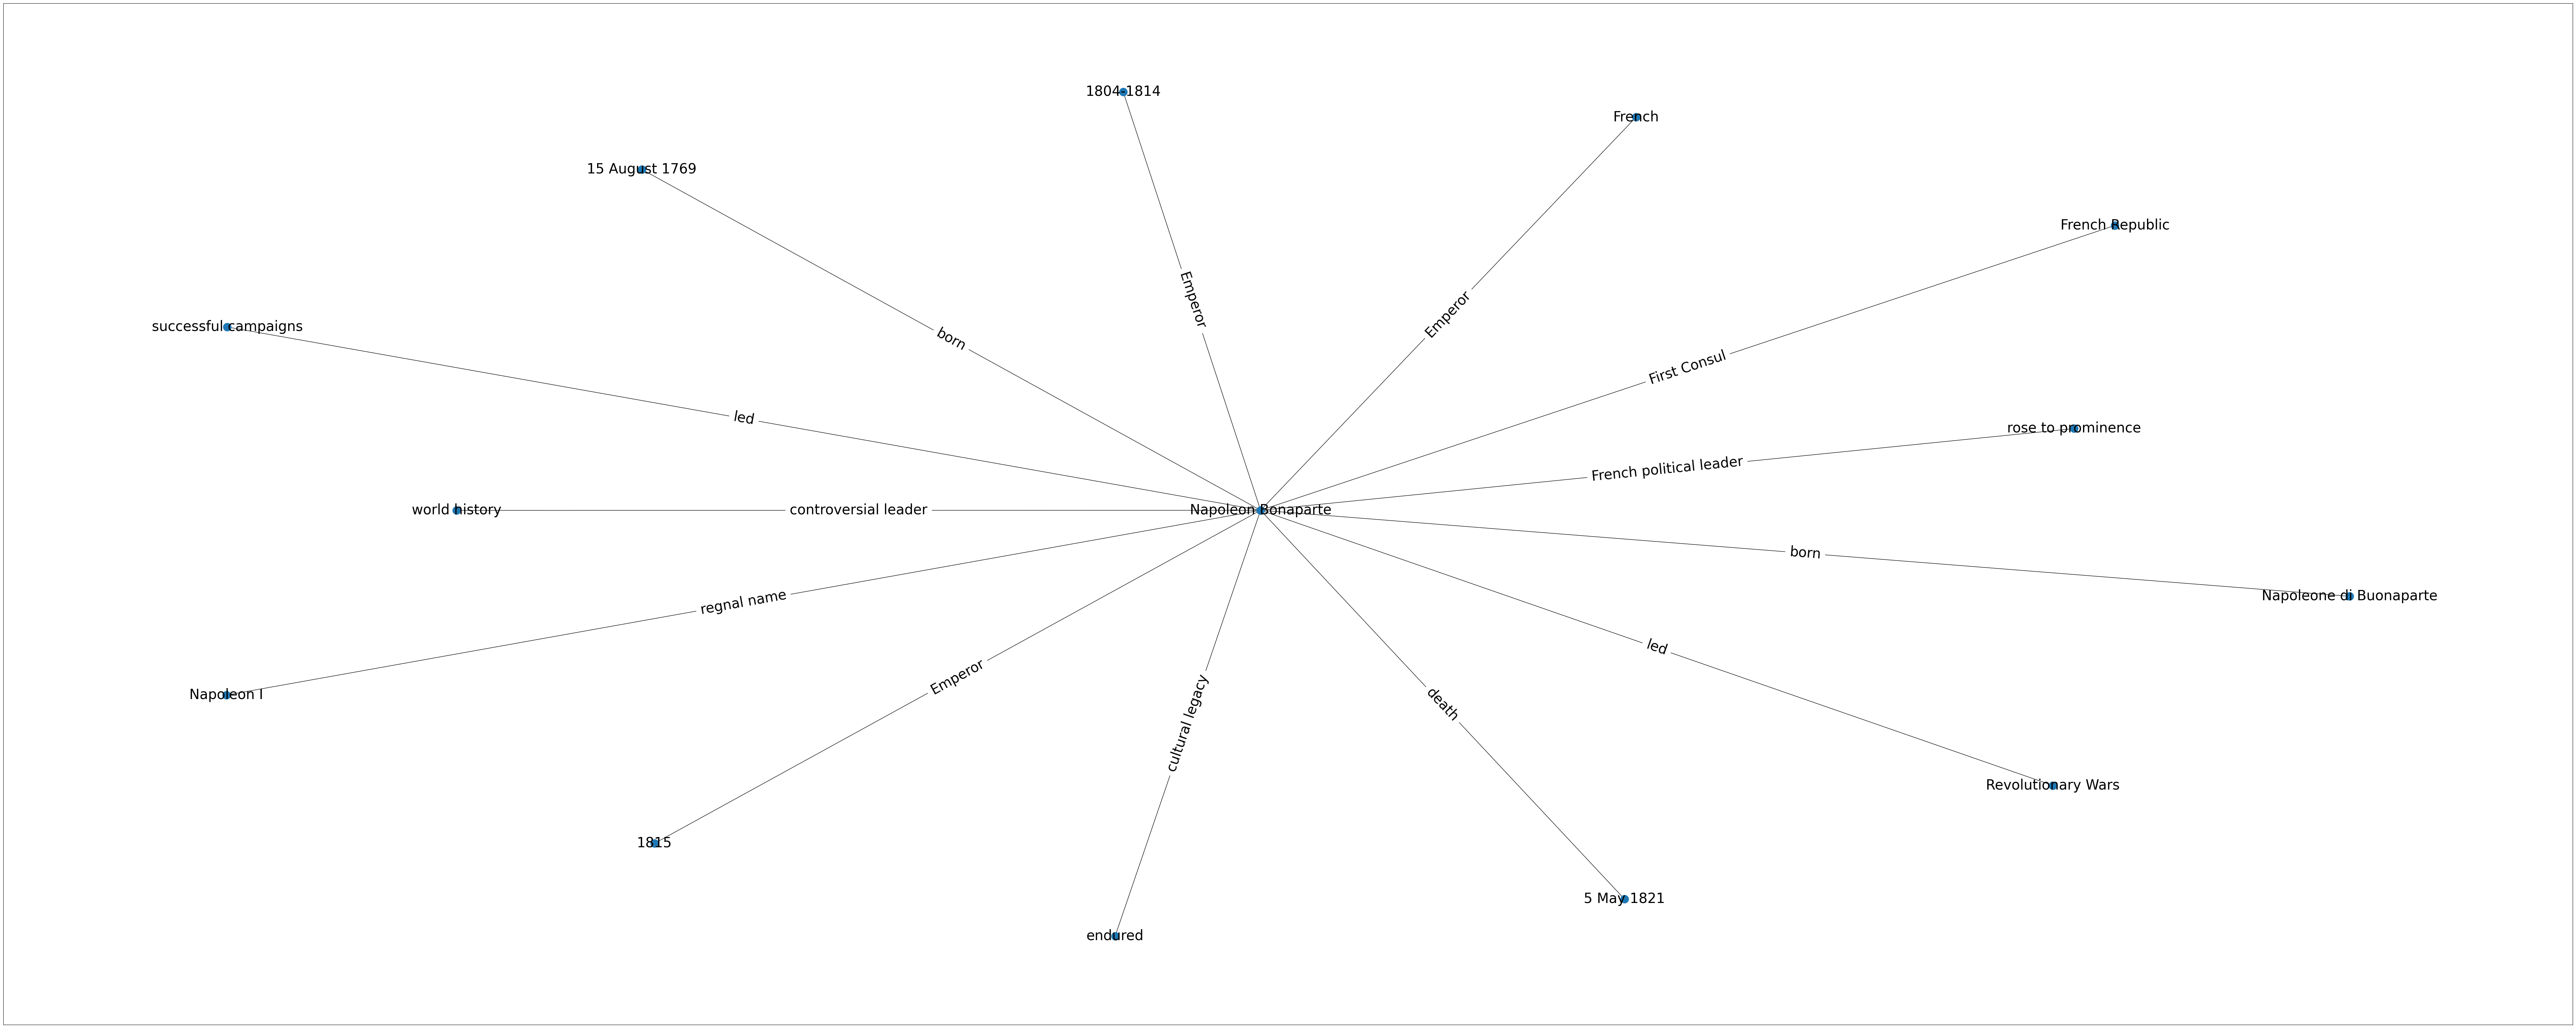

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(100, 40), dpi=100)
G = new_index.get_networkx_graph()
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_size=30)

plt.show()


In [ ]:
query_engine = new_index.as_query_engine(
    include_text=False,
    response_mode='tree_summarize',
    embedding_mode='default',
    similarity_top_k=2
)
response = query_engine.query(
    "write about napoleon?",
)

In [ ]:
display(Markdown(f"<b>{response}</b>"))

<b>Napoleon Bonaparte is widely regarded as a celebrated leader in world history. He is known for his remarkable leadership skills and military genius. Napoleon led the Revolutionary Wars, showcasing his strategic abilities and determination.

Napoleon Bonaparte was born in Corsica in 1769 and rose to power during the French Revolution. He quickly climbed the ranks of the military and established himself as a prominent figure. In 1799, he orchestrated a coup d'état and became the First Consul of France.

As the leader of France, Napoleon implemented numerous reforms and modernizations. He introduced the Napoleonic Code, a comprehensive set of laws that provided equality before the law and protected individual rights. This legal system had a lasting impact on many countries and continues to influence legal systems today.

Napoleon's military campaigns are legendary. He led France to victory in several significant battles, including the Battle of Austerlitz and the Battle of Marengo. His military strategies were innovative and effective, earning him a reputation as one of the greatest military minds in history.

However, Napoleon's ambitions eventually led to his downfall. He embarked on a series of costly wars of expansion, including the disastrous invasion of Russia in 1812. The combined forces of his enemies, known as the Sixth Coalition, eventually defeated him in the Battle of Waterloo in 1815. Napoleon was subsequently exiled to the island of Saint Helena, where he died in 1821.

Despite his eventual defeat, Napoleon Bonaparte left an indelible mark on history. His leadership, military prowess, and reforms continue to be studied and debated by historians today. Napoleon's impact on Europe and the world cannot be understated, making him a fascinating figure to explore in the annals of history.</b>